In [1]:
#ISupport Vector Machine 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error 

from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv('breast-cancer.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:

#sns.pairplot(dataset , hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','radius_worst', 'perimeter_worst' ])

In [5]:
#let's drop the diagnosis and id to define data feature 
X=dataset.drop(['diagnosis', 'id'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 0, 'B': 1}).astype(float)

In [7]:
y=dataset['diagnosis']
y.tail()

564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: diagnosis, dtype: float64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
sc= StandardScaler().fit(X_train)  #scaling the training data or else the accuracy will be low. scaling brings the classses/data points together which makes it easier to separate, hence higher accuracy

In [10]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
clf_svm = svm.SVC(kernel='rbf',C=2.5,gamma='auto')
clf_svm.fit(X_train_std,y_train) #I used linear kernle prior to rbf and resulted in 96% accuracy. 

SVC(C=2.5, gamma='auto')

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [13]:
y_test_pred = clf_svm.predict(X_test_std)

In [14]:
y_test_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.])

In [15]:
y_test

512    0.0
457    1.0
439    1.0
298    1.0
37     1.0
      ... 
213    0.0
519    1.0
432    0.0
516    0.0
500    1.0
Name: diagnosis, Length: 114, dtype: float64

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
confusion_matrix(y_test,y_test_pred)

array([[46,  1],
       [ 1, 66]])

In [18]:
accuracy_score(y_test,y_test_pred)

0.9824561403508771

In [19]:
from sklearn.model_selection import GridSearchCV #how do we know which c value to select at start? we don't, so we need to do a GridSeach to check for the optimal c value 

In [20]:
prams = {'C':(0.001,0.005,0.01,0.08,0.1,0.5,1,2.5,4.5,5,5.5,7,7,8,9,10,30,40,50,100,500,1000)}

In [21]:
clf_svm_l = svm.SVC(kernel='rbf')

In [22]:
svm_grid_lin= GridSearchCV(clf_svm_l,prams,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')

In [23]:
svm_grid_lin.fit(X_train_std,y_train)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.08, 0.1, 0.5, 1, 2.5, 4.5,
                               5, 5.5, 7, 7, 8, 9, 10, 30, 40, 50, 100, 500,
                               1000)},
             scoring='accuracy', verbose=1)

In [24]:
svm_grid_lin.best_params_

{'C': 2.5}

In [25]:
linsvm_clf = svm_grid_lin.best_estimator_

In [26]:
accuracy_score(y_test,linsvm_clf.predict(X_test_std))*100 #note that accuracy changed

98.24561403508771

In [27]:
#confusion_matrix 

from sklearn.metrics import confusion_matrix 
import seaborn as sns

cm=confusion_matrix(y_test,y_test_pred)

<AxesSubplot:>

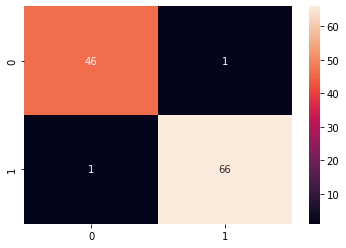

In [30]:
sns.heatmap(cm,annot=True,fmt='g')